In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/superstore-dataset-final/Sample - Superstore.csv


# 1. Предобработка данных:
* Проверка данных на пропуски и аномалии. 
* Заполнение или удаление пропусков.
* Преобразование форматов данных (например, дат) для удобства анализа.
* Вычисление дополнительных столбцов, если необходимо (например, если отсутствуют столбцы с общей прибылью или валовой выручкой).
* Проведение нормализации или стандартизации данных, если это необходимо для определенных методов анализа.

In [4]:
# Загрузим данные в датафрейм df
path = '/kaggle/input/superstore-dataset-final/Sample - Superstore.csv'
df = pd.read_csv(path, encoding='latin-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Предобработка данных — это важнейший этап в работе с данными, который включает очистку, трансформацию и подготовку данных перед их использованием в моделях машинного обучения или для анализа. Этот процесс помогает исправить ошибки, устранить пропуски, сделать данные более подходящими для анализа и повысить точность прогнозов.

In [5]:
# Посмотрим на информацию о наших данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

Как видно у нас есть object и числовые типы данных.
На мой взгляд полезными будут данные 'Ship Mode','Segment','Country','City', 'State', 'Region', 'Product ID' 'Category', 'Sub-Category', 'Product Name', Sales, Quantity, Discount, Profit

In [6]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## Очистка данных

**Работа с пропусками**

Пропуски — это отсутствующие значения в данных. Их нужно либо заполнить (импутировать), либо удалить.

**Удаление дубликатов**

Иногда данные содержат дубликаты, которые могут исказить анализ.

In [7]:
# Проверка на пропуски
print(df.isnull().sum())
# Проверка на дубликаты
print(df.duplicated().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64
0


**Написать код для вывода всех существующих категорий и подкатегорий**

**Работа с выбросами**

Выбросы — это аномальные значения, которые сильно отклоняются от остальных данных и могут повлиять на анализ.

In [6]:
# Пример поиска выбросов через межквартильный размах (IQR) для Sales
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

print(Q1, Q3, IQR)

# Определение границ выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Фильтрация выбросов
df = df[(df['Sales'] >= lower_bound) & (df['Sales'] <= upper_bound)]

17.28 209.94 192.66


### Трансформация данных
**Кодирование категориальных переменных**
Модели машинного обучения не могут напрямую работать с категориальными (текстовыми) данными. Их нужно преобразовать в числовые значения. Для этого можно использовать Label Encoding или One-Hot Encoding.

In [7]:
# Label Encoding (присваивает числовые значения каждой категории)
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['Category'] = le.fit_transform(df['Category'])

**Масштабирование и нормализация данных**
Для некоторых моделей важно, чтобы данные были масштабированы (особенно если признаки имеют разные единицы измерения). Масштабирование может улучшить производительность моделей.

In [13]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Стандартизация данных (приведение к нормальному распределению с центром в 0 и стандартным отклонением 1)
# scaler = StandardScaler()
# data['Sales_scaled'] = scaler.fit_transform(data[['Sales']])

# Нормализация (приведение значений к диапазону от 0 до 1)
# minmax_scaler = MinMaxScaler()
# data['Sales_normalized'] = minmax_scaler.fit_transform(data[['Sales']])

**Преобразование форматов данных**
Если у вас есть даты, их нужно преобразовать в формат, удобный для анализа.

In [8]:
# Преобразование строки в формат даты
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Извлечение дополнительных признаков, например, года и месяца
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Day'] = df['Order Date'].dt.day

### Создание новых признаков (Feature Engineering)
Создание новых признаков может улучшить качество моделей и позволить глубже анализировать данные.

In [9]:
# Пример: создание нового признака — общая цена со скидкой
df['Total_Price'] = df['Sales'] * (1 - df['Discount']) * df['Quantity']

# Пример: признак для сегментации клиентов на основе категории и региона
# df['Customer_Segment'] = df['Category'] + '_' + df['Region']


In [10]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year,Month,Day,Total_Price
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,8,523.920000
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,8,2195.820000
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6,12,29.240000
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,11,2633.338125
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10,11,35.788800


# Анализ данных

## Часть 1: Описание данных (Exploratory Data Analysis, EDA)

Визуализация распределения продаж по категориям и подкатегориям товаров.
* Построить гистограммы и круговые диаграммы, чтобы показать распределение продаж и прибыли по категориям.

Анализ распределения по регионам:
* Построить графики для выявления самых прибыльных и убыточных регионов.

Анализ сегментов клиентов:
* Оценить, какие сегменты клиентов приносят наибольшую прибыль.

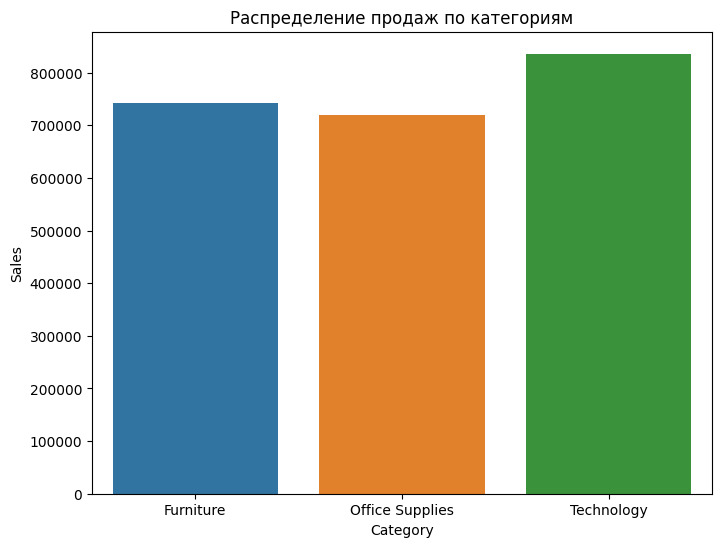

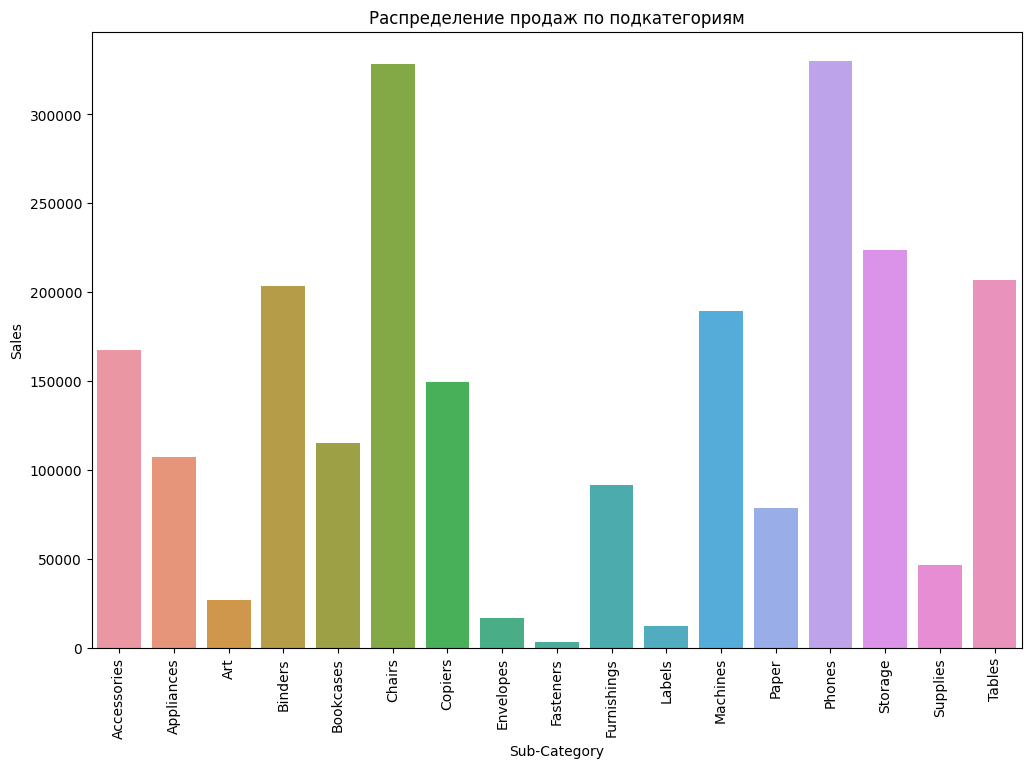

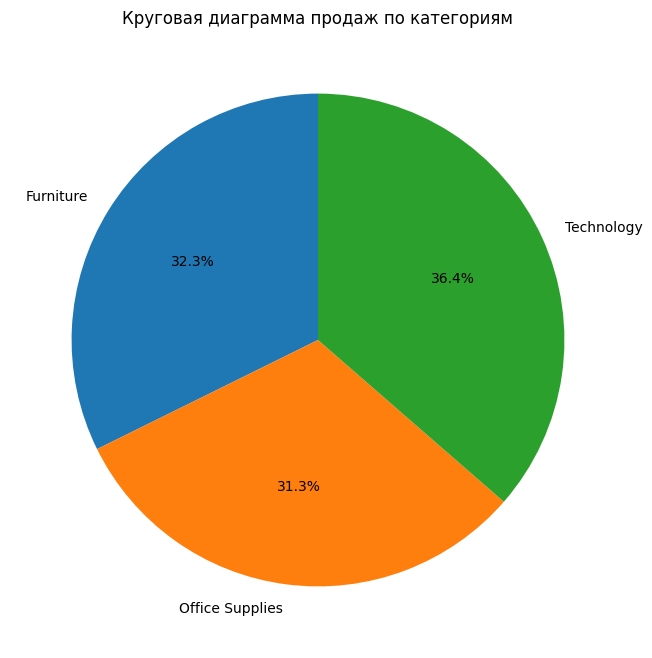

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Суммарные продажи по категориям
category_sales = df.groupby('Category')['Sales'].sum().reset_index()

# Построение гистограммы для категорий
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Sales', data=category_sales)
plt.title('Распределение продаж по категориям')
plt.show()

# Суммарные продажи по подкатегориям
subcategory_sales = df.groupby('Sub-Category')['Sales'].sum().reset_index()

# Построение гистограммы для подкатегорий
plt.figure(figsize=(12, 8))
sns.barplot(x='Sub-Category', y='Sales', data=subcategory_sales)
plt.xticks(rotation=90)
plt.title('Распределение продаж по подкатегориям')
plt.show()

# Построение круговой диаграммы для категорий
plt.figure(figsize=(8, 8))
plt.pie(category_sales['Sales'], labels=category_sales['Category'], autopct='%1.1f%%', startangle=90)
plt.title('Круговая диаграмма продаж по категориям')
plt.show()


**Визуализация прибыли по категориям**
Точно так же можно проанализировать прибыль по категориям, если в данных есть столбец Profit.

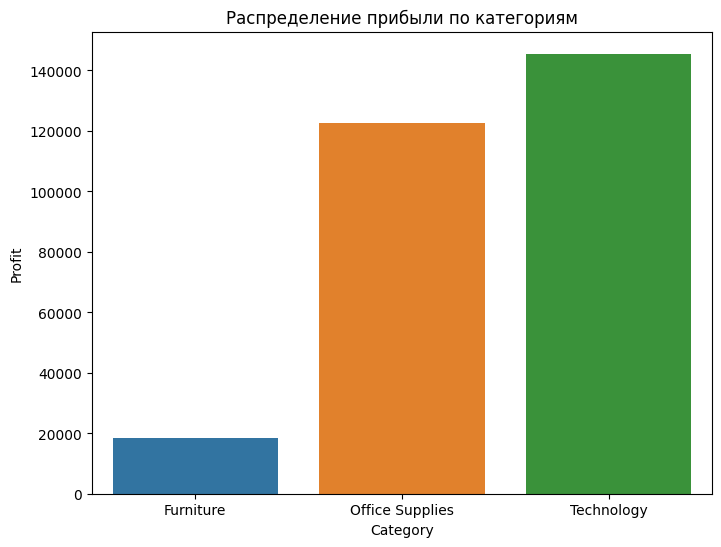

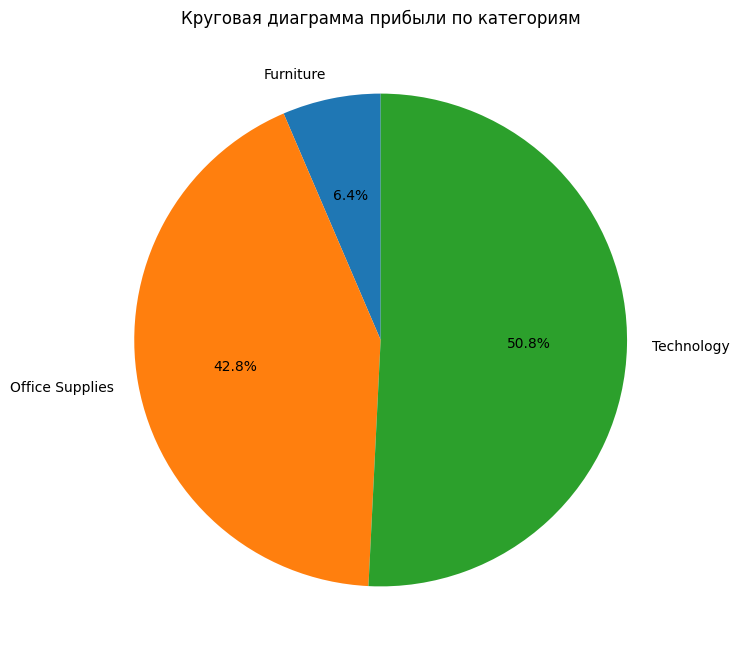

In [12]:
# Суммарная прибыль по категориям
category_profit = df.groupby('Category')['Profit'].sum().reset_index()

# Построение гистограммы для прибыли по категориям
plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Profit', data=category_profit)
plt.title('Распределение прибыли по категориям')
plt.show()

# Построение круговой диаграммы прибыли по категориям
plt.figure(figsize=(8, 8))
plt.pie(category_profit['Profit'], labels=category_profit['Category'], autopct='%1.1f%%', startangle=90)
plt.title('Круговая диаграмма прибыли по категориям')
plt.show()

**Анализ распределения по регионам**
Для анализа по регионам нам нужны столбцы, такие как Region (регион) и Profit (прибыль). Мы можем построить гистограммы, чтобы понять, в каких регионах компания получает наибольшую и наименьшую прибыль.

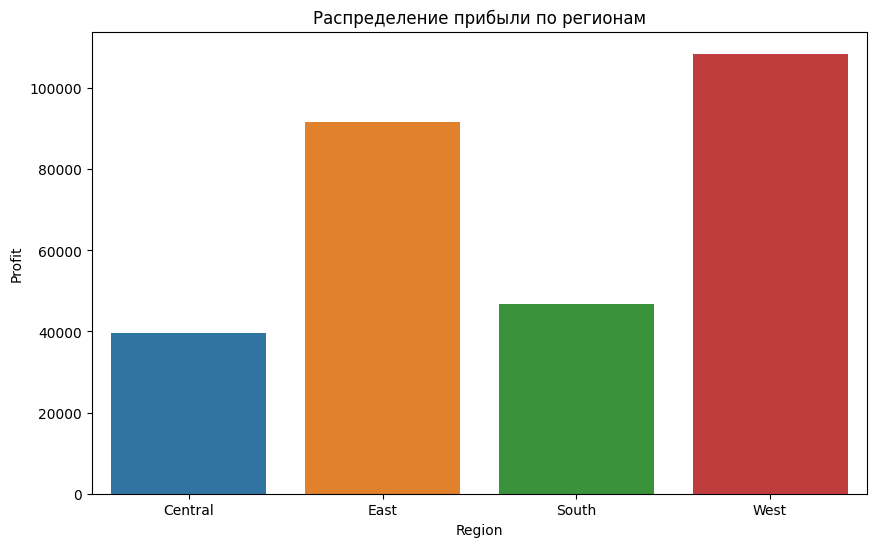

In [13]:
# Суммарная прибыль по регионам
region_profit = df.groupby('Region')['Profit'].sum().reset_index()

# Построение гистограммы для регионов
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Profit', data=region_profit)
plt.title('Распределение прибыли по регионам')
plt.show()

**Анализ сегментов клиентов**
В наборе данных может быть столбец, например, Customer Segment (сегмент клиента), который разделяет клиентов на разные категории (например, "Consumer", "Corporate", "Home Office"). Нужно оценить, какие сегменты приносят наибольшую прибыль.

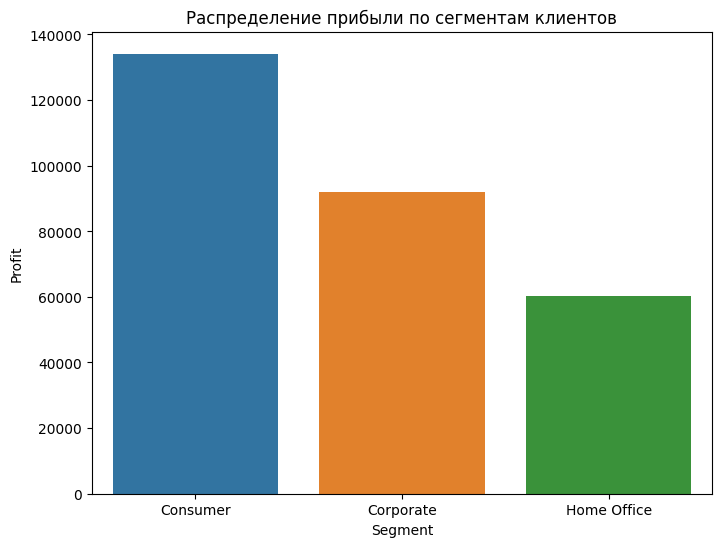

In [14]:
# Суммарная прибыль по сегментам клиентов
segment_profit = df.groupby('Segment')['Profit'].sum().reset_index()

# Построение гистограммы для сегментов клиентов
plt.figure(figsize=(8, 6))
sns.barplot(x='Segment', y='Profit', data=segment_profit)
plt.title('Распределение прибыли по сегментам клиентов')
plt.show()

**Анализ продаж и прибыли по временным рамкам**
Если в данных есть временные признаки (например, Order Date — дата заказа), можно выполнить анализ продаж и прибыли во временном разрезе.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


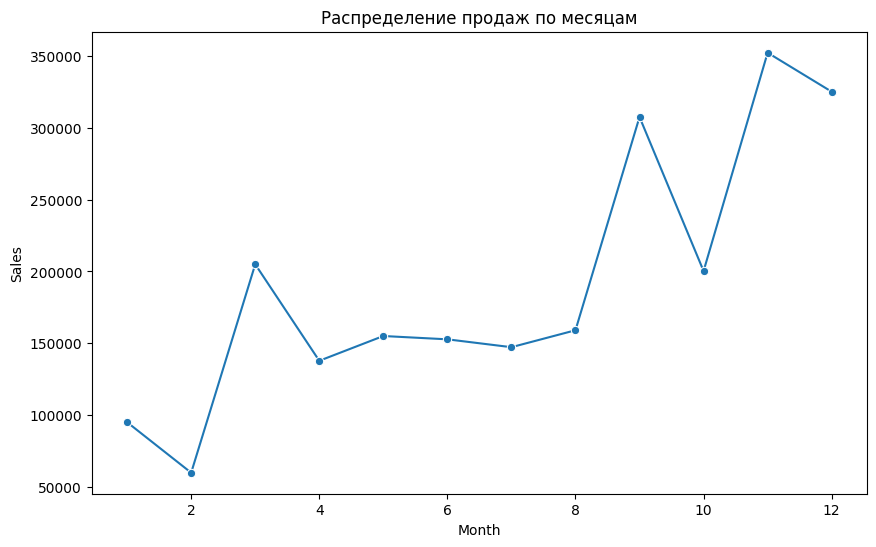

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


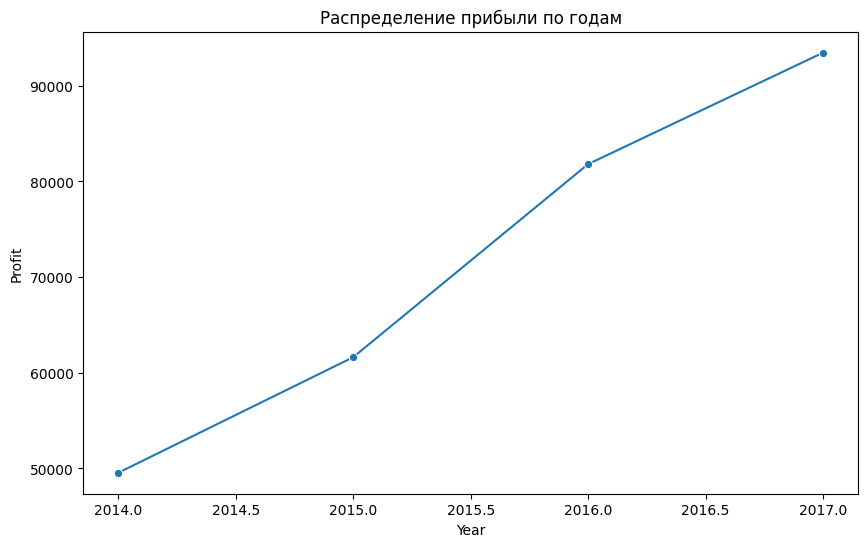

In [15]:
# Преобразование даты заказа в формат datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Создание новых столбцов "год" и "месяц"
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Суммарные продажи по месяцам
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()

# Построение графика продаж по месяцам
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Sales', data=monthly_sales, marker='o')
plt.title('Распределение продаж по месяцам')
plt.show()

# Суммарная прибыль по годам
yearly_profit = df.groupby('Year')['Profit'].sum().reset_index()

# Построение графика прибыли по годам
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Profit', data=yearly_profit, marker='o')
plt.title('Распределение прибыли по годам')
plt.show()


Теперь можно отфильтровать данные по нужному году. Например, если нужно получить данные только за 2023 год:

    Month       Sales
0       1  14236.8950
1       2   4519.8920
2       3  55691.0090
3       4  28295.3450
4       5  23648.2870
5       6  34595.1276
6       7  33946.3930
7       8  27909.4685
8       9  81777.3508
9      10  31453.3930
10     11  78628.7167
11     12  69545.6205
    Month     Profit
0       1  2450.1907
1       2   862.3084
2       3   498.7299
3       4  3488.8352
4       5  2738.7096
5       6  4976.5244
6       7  -841.4826
7       8  5318.1050
8       9  8328.0994
9      10  3448.2573
10     11  9292.1269
11     12  8983.5699


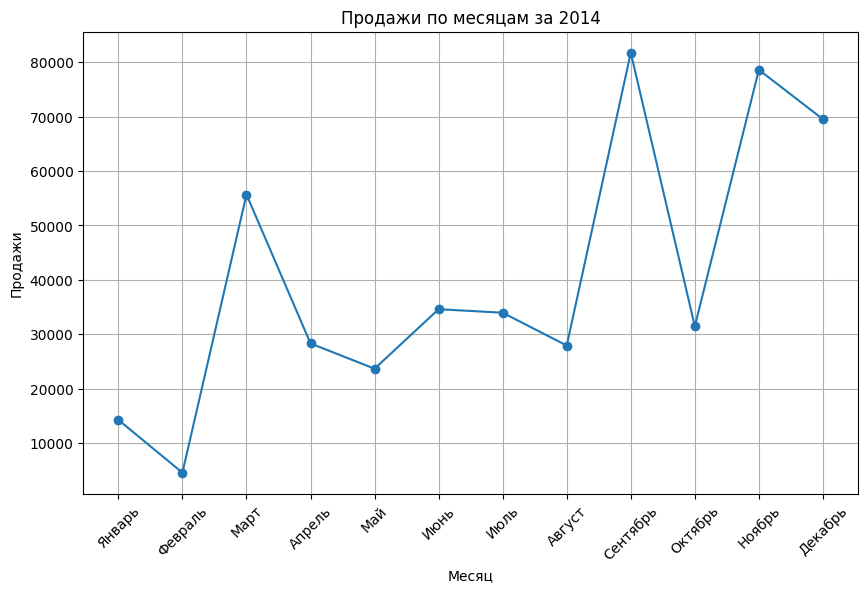

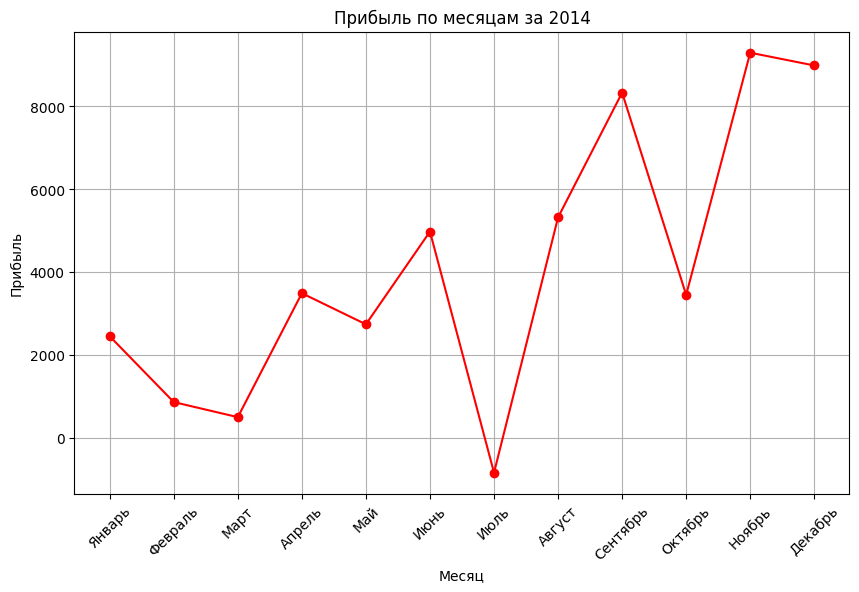

In [16]:
year_of_interest = 2014
df_year = df[df['Year'] == year_of_interest]
# Агрегация данных по месяцам за конкретный год
monthly_sales = df_year.groupby('Month')['Sales'].sum().reset_index()
monthly_profit = df_year.groupby('Month')['Profit'].sum().reset_index()

print(monthly_sales)
print(monthly_profit)

import matplotlib.pyplot as plt

# Построение графика продаж по месяцам
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Month'], monthly_sales['Sales'], marker='o', linestyle='-')
plt.title(f'Продажи по месяцам за {year_of_interest}')
plt.xlabel('Месяц')
plt.ylabel('Продажи')
plt.xticks(ticks=range(1, 13), labels=[
    'Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь',
    'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'
], rotation=45)
plt.grid(True)
plt.show()

# Построение графика прибыли по месяцам
plt.figure(figsize=(10, 6))
plt.plot(monthly_profit['Month'], monthly_profit['Profit'], marker='o', linestyle='-', color='r')
plt.title(f'Прибыль по месяцам за {year_of_interest}')
plt.xlabel('Месяц')
plt.ylabel('Прибыль')
plt.xticks(ticks=range(1, 13), labels=[
    'Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь',
    'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'
], rotation=45)
plt.grid(True)
plt.show()


**Анализ сегментов клиентов:**
Оценить, какие сегменты клиентов приносят наибольшую прибыль.

In [17]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Year',
       'Month', 'Day', 'Total_Price'],
      dtype='object')

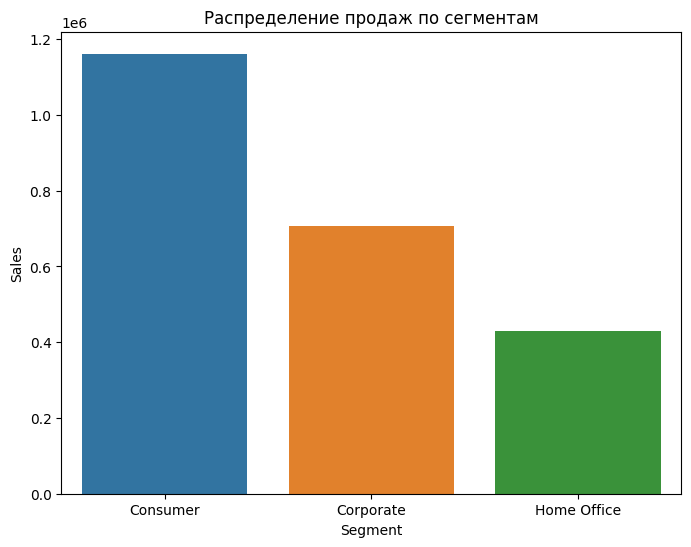

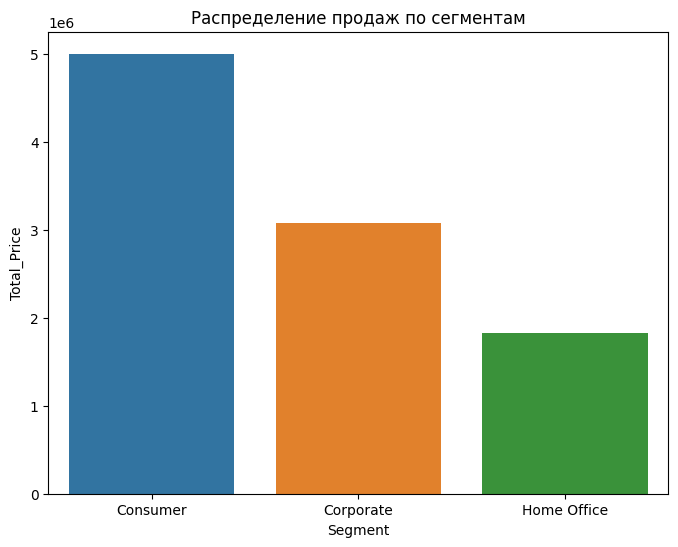

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

segments_sales = df.groupby('Segment')['Sales'].sum().reset_index()
segments_total_price = df.groupby('Segment')['Total_Price'].sum().reset_index()

plt.figure(figsize=(8,6))
sns.barplot(x='Segment', y='Sales', data=segments_sales)
plt.title('Распределение продаж по сегментам')
plt.show()

plt.figure(figsize=(8,6))
sns.barplot(x='Segment', y='Total_Price', data=segments_total_price)
plt.title('Распределение продаж по сегментам')
plt.show()



## Часть 2: Анализ сезонности продаж

Временной анализ:

Построить графики продаж по месяцам/неделям/кварталам.

Найти пиковые периоды продаж в году (например, сезонные колебания в черную пятницу, перед Новым годом и т.д.).

Построить тренды продаж, используя метод скользящего среднего.

In [19]:
yearly_monthly_sales = df.groupby(['Year','Month'])['Sales'].sum().reset_index()
yearly_monthly_sales

,Year,Month,Sales
0,2014,1,14236.8950
1,2014,2,4519.8920
2,2014,3,55691.0090
3,2014,4,28295.3450
4,2014,5,23648.2870
5,2014,6,34595.1276
6,2014,7,33946.3930
7,2014,8,27909.4685
8,2014,9,81777.3508
9,2014,10,31453.3930


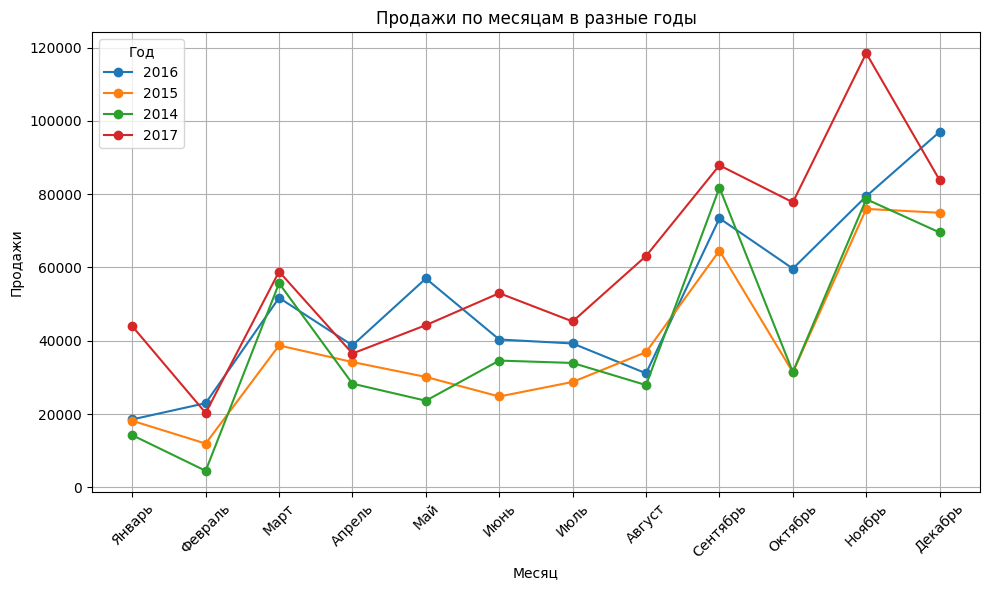

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))

for year in df['Year'].unique():
    df_year = yearly_monthly_sales[yearly_monthly_sales['Year'] == year]
    plt.plot(df_year['Month'], df_year['Sales'], marker='o', linestyle='-', label=year)
    
# Настройки графика
plt.title('Продажи по месяцам в разные годы')
plt.xlabel('Месяц')
plt.ylabel('Продажи')
plt.xticks(ticks=range(1, 13), labels=[
    'Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь',
    'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'
], rotation=45)
plt.grid(True)
plt.legend(title="Год")
plt.tight_layout()
plt.show()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   object        
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

   Row ID        Order ID Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

                                        Product Name     Sales Quantity  \
0                  Bush

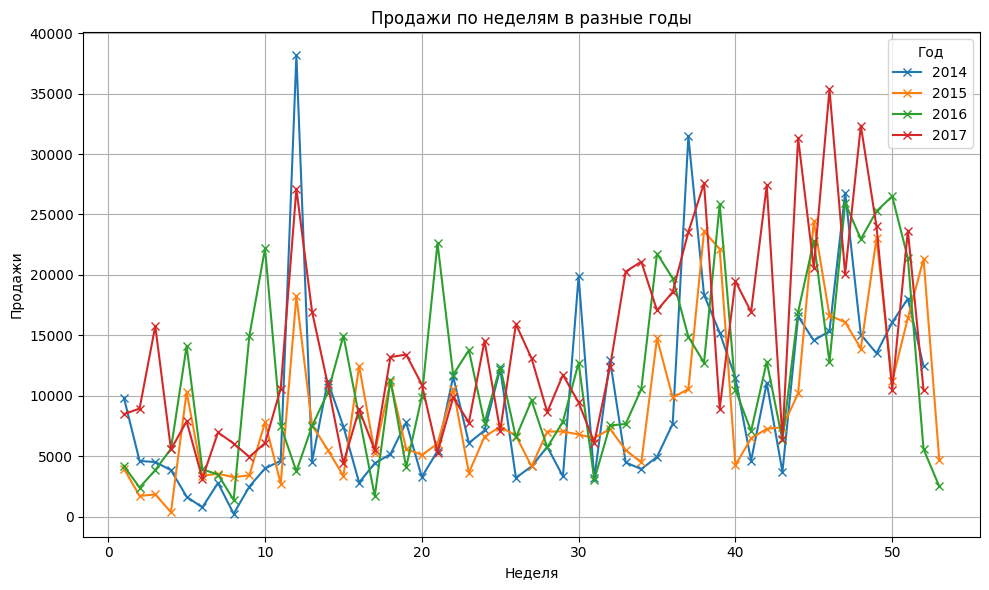

In [31]:
df['Week'] = df['Order Date'].dt.isocalendar().week
print(df.head())

year_week_sales = df.groupby(['Year', 'Week'])['Sales'].sum().reset_index()

plt.figure(figsize=(10,6))
for year in year_week_sales['Year'].unique():
    df_year = year_week_sales[year_week_sales['Year'] == year]
    plt.plot(df_year['Week'], df_year['Sales'], marker = 'x', label= year)
    
# Настройка графика
plt.title('Продажи по неделям в разные годы')
plt.xlabel('Неделя')
plt.ylabel('Продажи')
plt.grid(True)
plt.legend(title="Год")
plt.tight_layout()
plt.show()   

   Row ID        Order ID Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...     Sales  \
0      Claire Gute   Consumer  United States        Henderson  ...  261.9600   
1      Claire Gute   Consumer  United States        Henderson  ...  731.9400   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   14.6200   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...  957.5775   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   22.3680   

   Quantity Discount    Profit  Year M

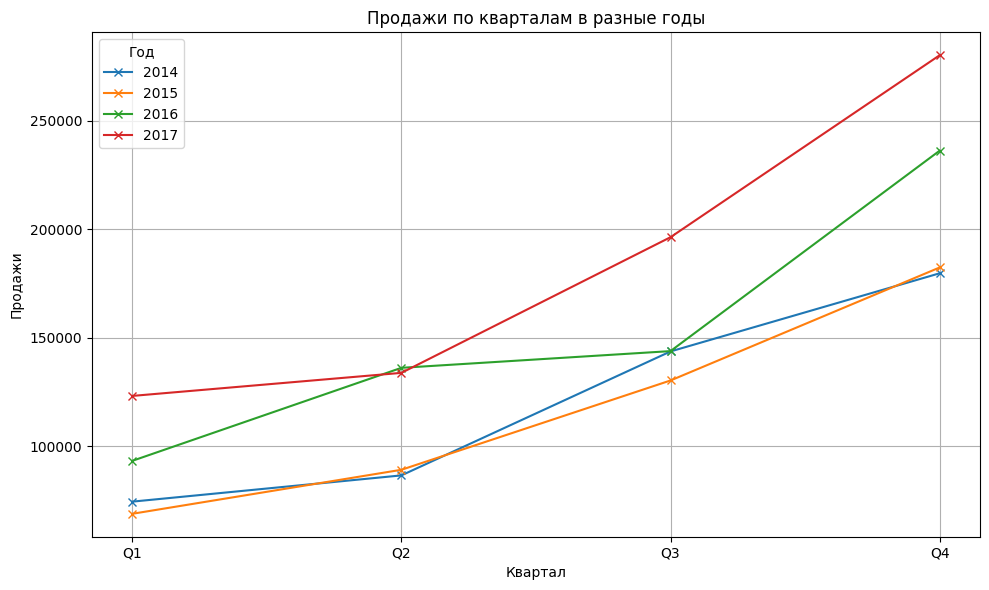

In [33]:
df['Quarter'] = df['Order Date'].dt.quarter
print(df.head())

year_quarter_sales = df.groupby(['Year', 'Quarter'])['Sales'].sum().reset_index()

plt.figure(figsize=(10,6))
for year in year_quarter_sales['Year'].unique():
    df_year = year_quarter_sales[year_quarter_sales['Year'] == year]
    plt.plot(df_year['Quarter'], df_year['Sales'], marker = 'x', label= year)
    
# Настройка графика
plt.title('Продажи по кварталам в разные годы')
plt.xlabel('Квартал')
plt.ylabel('Продажи')
plt.grid(True)
plt.xticks([1, 2, 3, 4], ['Q1', 'Q2', 'Q3', 'Q4'])
plt.legend(title="Год")
plt.tight_layout()
plt.show()  

**Найти пиковые периоды продаж в году (например, сезонные колебания в черную пятницу, перед Новым годом и т.д.).**

In [38]:
df = df.sort_values(by = ['Order Date'])

Скользящее среднее****

In [43]:
# Применение скользящего среднего для сглаживания данных
df['Sales_SMA_4'] = df['Sales'].rolling(window=4).mean()  # 4-недельное скользящее среднее

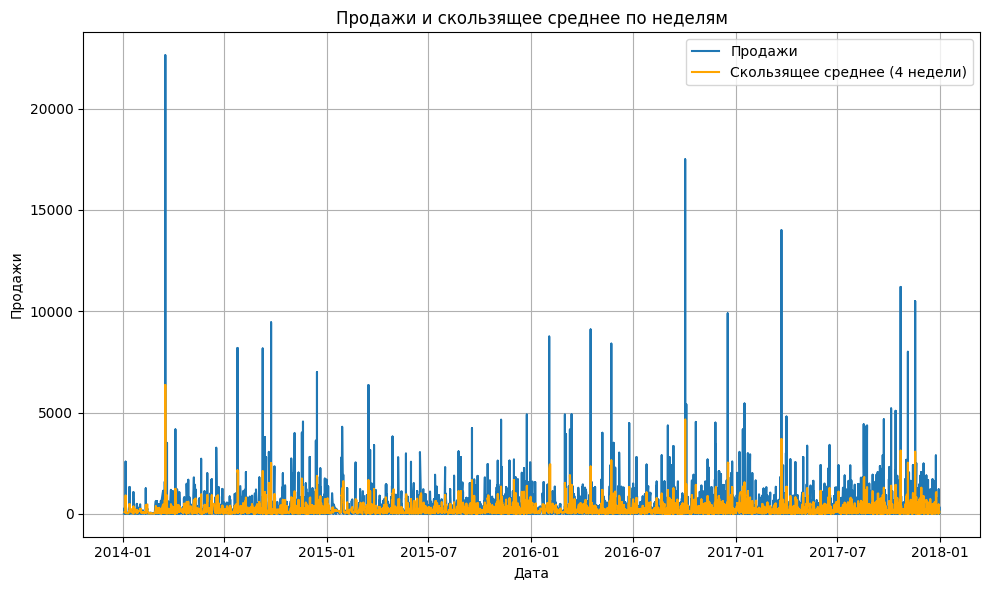

In [44]:
# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(df['Order Date'], df['Sales'], label='Продажи')
plt.plot(df['Order Date'], df['Sales_SMA_4'], label='Скользящее среднее (4 недели)', color='orange')
plt.title('Продажи и скользящее среднее по неделям')
plt.xlabel('Дата')
plt.ylabel('Продажи')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipykernel_36/2283302768.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year['Sales_SMA_4'] = df_year['Sales'].rolling(window=4).mean()  # 4-недельное скользящее среднее
/tmp/ipykernel_36/2283302768.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year['Sales_SMA_4'] = df_year['Sales'].rolling(window=4).mean()  # 4-недельное скользящее среднее
/tmp/ipykernel_36/2283302768.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

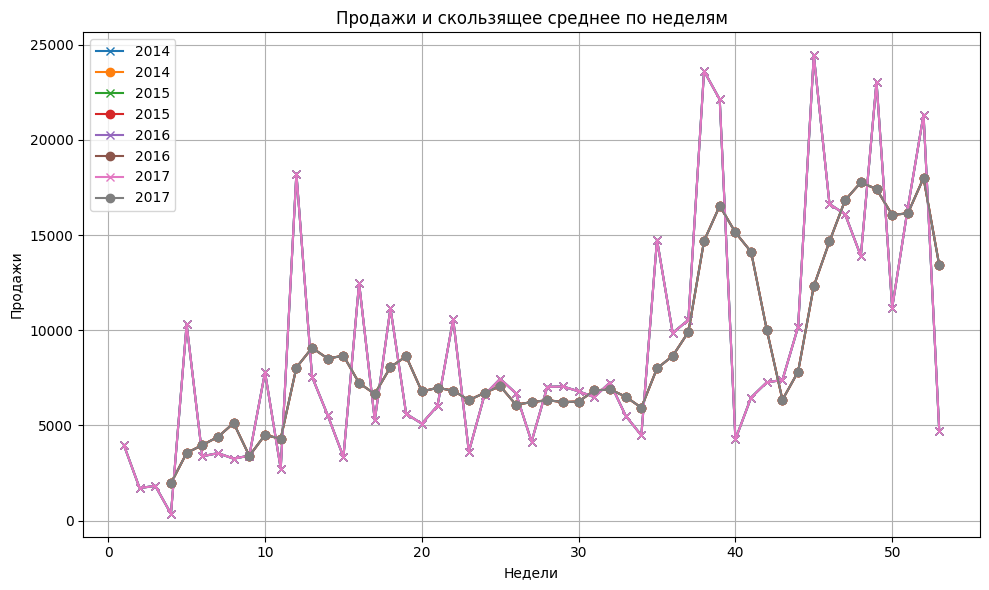

In [48]:
plt.figure(figsize=(10,6))

for year in year_week_sales['Year'].unique():
    df_year = year_week_sales[year_week_sales['Year'] == 2015]
    # Применение скользящего среднего для сглаживания данных
    df_year['Sales_SMA_4'] = df_year['Sales'].rolling(window=4).mean()  # 4-недельное скользящее среднее
    plt.plot(df_year['Week'], df_year['Sales'], marker = 'x', label= year)
    plt.plot(df_year['Week'], df_year['Sales_SMA_4'], marker = 'o', label= year)


plt.title('Продажи и скользящее среднее по неделям')
plt.xlabel('Недели')
plt.ylabel('Продажи')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Часть 3: Анализ скидок и их влияния на прибыль

Оценка влияния скидок на продажи:
* Выявить, увеличиваются ли продажи при предоставлении скидок, и как это сказывается на прибыли.
* Построить зависимость между размером скидки и прибылью.
* Найти оптимальный размер скидки, при котором сохраняется баланс между увеличением объема продаж и снижением прибыли.

## Часть 4: Анализ прибыльности категорий и комбинаций товаров

Поиск наиболее прибыльных и убыточных категорий товаров:
* Построить графики по категориям, которые приносят наибольшую прибыль.
* Построить тепловую карту комбинаций категорий и подкатегорий, которые приносят максимальную/минимальную прибыль.

Анализ корреляций:
* Найти корреляции между количеством продаж, выручкой, прибылью и скидками.

# Рекомендации по результатам анализа:
На основе анализа данных предложить рекомендации для улучшения продаж, например:
* Какие товары и регионы стоит продвигать для увеличения прибыли?
* Оптимальный размер скидок.
* Сегменты клиентов, на которые стоит обратить больше внимания для увеличения продаж.
* В какие периоды лучше запускать рекламные кампании.

# Визуализация и отчет:
Построить отчеты и дашборды с визуализацией ключевых метрик, например:
* Графики трендов продаж.
* Гистограммы и круговые диаграммы по регионам, категориям товаров и сегментам клиентов.
* Временные ряды для анализа сезонных изменений в продажах.
* Тепловые карты скидок и прибыли.
Инструменты для визуализации: Matplotlib, Seaborn, Plotly.